# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
# tells python to actually display the graphs

### Understanding the structure of the data

In [2]:
# read the data
data = pd.read_csv(r"C:\Users\igorm\OneDrive\Desktop\CAREER_DS_BIG DATA\UNIVERSITY OF TEXAS DS_BA\DATA FILES\foodhub_order.csv")
# returns the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [3]:
data.shape

(1898, 9)

#### Observations:

#### 1.- data.shape allows us to know the number of rows x number of columns. In data science, the rows are known as records, cases, instance, observations, pattern or sample while the columns are known as Features, attributes, input, predictor or variable.
#### 2.- In this case, we have 1898 rows(records) and 9 (attributes), it is speaking about the dimensionality of the data as a two-dimensional matrix, which allows to have a relative idea wheter a given dataset is small or big. Having said this, we can label this dataset as a small one.


### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### we can do a double check on the null values with this command, which give you a boolean(True)on each cell with Not null values.

In [5]:
data.notnull() 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
1893,True,True,True,True,True,True,True,True,True
1894,True,True,True,True,True,True,True,True,True
1895,True,True,True,True,True,True,True,True,True
1896,True,True,True,True,True,True,True,True,True


In [6]:
data[data.notnull()] 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


#### Observations:

#### 1.-Through the extraction of the information we can see that none of the attributes has null values, which is the ideal condition for the data analysis since we don't have to drop or fill any row or column in the dataset, and thus, this cannot affect the purpose of the analysis reducing confidence in the results.




### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [7]:
# Coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data

# Use info() to print a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

#### We can observe that 3 out of 9 variables are "Object" type. Converting from "Object" to "Category" type can lead us to 3 important achievements in our projects: 
#### 1.- "Categorycal" type uses less memory, which can be translate into performance improvements.
#### 2.- Customized clasification order which could enhance the data report and summary.
#### 3.- Some of the python libraries can translate categorical data for the appropiate statistical modeling and plot types.(https://pbpython.com/pandas_dtypes_cat.html)



In [8]:
# copying data to another varaible to avoid any changes to original data
data1 = data.copy()

In [9]:
data1.restaurant_name = data1.restaurant_name.astype('category')     # Converting the column restaurant_name to 'category'
data1.cuisine_type = data1.cuisine_type.astype('category')           # Converting the column cuisine_type to 'category'
data1.day_of_the_week = data1.day_of_the_week.astype('category')     # Converting the column day_of _the_week to 'category'

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Now we have converted 'restaurant_name', 'cuisine_type' and 'day_of_the_week' to category type. We check on the new copy of the dataset 'data1' applying the command data1.info() again.

### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [10]:
data1.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [11]:
data1.describe().T # We calculate the Tranpose for a more didactic display 

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations: 
#### 1.- No abnormal trends are observed between the variables. In the case of preparation times and delivery times, the data is quite similar in terms of percentiles, maximum and minimum values and the standard deviation. While in the case of the cost of the orders, the standard deviation is greater, which indicates a greater dispersion between the data, which seems logical.


In [12]:
data.quantile(0.75) - data.quantile(0.25)

order_id                    948.5000
customer_id              192737.2500
cost_of_the_order            10.2175
food_preparation_time         8.0000
delivery_time                 8.0000
dtype: float64

### **Question 5:** How many orders are not rated? (0.5 mark)

In [13]:
data1['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [14]:
print('"NOT GIVEN" rated orders are = 736')

"NOT GIVEN" rated orders are = 736


#### We can calculate the percentual weight of each rating

In [15]:
data1['rating'].value_counts('rating')

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

In [16]:
print('"NOT GIVEN" orders represents the 38.77% of the total orders')

"NOT GIVEN" orders represents the 38.77% of the total orders


In [17]:
data1.groupby('rating')['cost_of_the_order'].mean()

rating
3            16.223351
4            16.710337
5            16.965697
Not given    16.085340
Name: cost_of_the_order, dtype: float64

#### Observations: 

#### 1.- "NOT GIVEN" rated orders represents the 38.77%, 5 rated orders = 30.98%, 4 rated orders = 20.33%, and 3 rated orders = 9.90%.

#### 2.- "NOT GIVEN" orders represents an important percentage(almost 40%) within the data so we need to think in a reward or discount program for the clients who complete the rating.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

#### We have to analyze individually all the variables that compose the data set as: order_id, customer_id, restaurant_name, cuisine_type, cost_of_the _order, day_of_the_week, rating, food_preparation_time, and delivery_time.

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

### order_id
#### 1.- we can validate how many unique orders do we have in the dataset through the use of the functions ".nunique" ".value_counts" combined with the column "order_id".

In [18]:
data['order_id'].value_counts().shape[0]

1898

In [19]:
data['order_id'].nunique()

1898

In [20]:
data1.customer_id.nunique()
data1.order_id.nunique()

1898

### customer_id

 #### We can check the unique customer_id values  and the total number of these within the dataset

#### 1.- Obtaining the array of the unique customer_id numbers 

In [21]:
data['customer_id'].unique() 

array([337525, 358141,  66393, ...,  97838, 292602, 397537], dtype=int64)

#### 2.- Declare a variable containing the array with the unique customers_id

In [22]:
customer_id_unique = data1['customer_id'].unique() 

#### 3.- We call the size of the array to see the exact number of different customer_id

In [23]:
customer_id_unique.size 

1200

#### 4.- Percentage of the unique customer_id within the dataset

In [24]:
print("Percentage of unique customer_id is:", round(1200/1898*100, 2), '%')

Percentage of unique customer_id is: 63.22 %


#### 5.- Top ten of the customer_id with more orders

In [25]:
data1['customer_id'].value_counts().head(10)

52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
Name: customer_id, dtype: int64

### restaurant_name

#### 1.- Obtaining the array of the unique restaurants_name

In [26]:
data1['restaurant_name'].unique()

['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana', 'Blue Ribbon Fried Chicken', 'Dirty Bird to Go', ..., 'Rye House', 'Hiroko's Place', 'Frank Restaurant', 'Sarabeth's West', ''wichcraft']
Length: 178
Categories (178, object): [''wichcraft', '12 Chairs', '5 Napkin Burger', '67 Burger', ..., 'brgr', 'da Umberto', 'ilili Restaurant', 'indikitch']

#### 2.- Declare a variable containing the array with the unique restaurant_name

In [27]:
restaurant_name_unique = data1['restaurant_name'].unique() 

#### 3.- We call the size of the array to see the exact number of different restaurant_name

In [28]:
restaurant_name_unique.size

178

#### 4.- Top ten of the restaurants with more orders

In [29]:
data1['restaurant_name'].value_counts().head(10)

Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: restaurant_name, dtype: int64

### cuisine_type

#### 1.- Obtaining the array of the unique cuisine_type

In [30]:
data1['cuisine_type'].unique()

['Korean', 'Japanese', 'Mexican', 'American', 'Indian', ..., 'Thai', 'Southern', 'French', 'Spanish', 'Vietnamese']
Length: 14
Categories (14, object): ['American', 'Chinese', 'French', 'Indian', ..., 'Southern', 'Spanish', 'Thai', 'Vietnamese']

#### 2.- Declare a variable containing the array with the unique cuisine_type

In [31]:
cuisine_type_unique = data1['cuisine_type'].unique() 

#### 3.- We call the size of the array to see the exact number of different restaurant_name

In [32]:
cuisine_type_unique.size

14

#### 4.- Top ten of the cuisine type with more orders

In [33]:
data1['cuisine_type'].value_counts().head(10)

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Name: cuisine_type, dtype: int64

#### 5.- Top ten of the percentual weight by cuisine type

In [34]:
data1['cuisine_type'].value_counts('cuisine_type').head(10)

American          0.307692
Japanese          0.247629
Italian           0.157007
Chinese           0.113277
Mexican           0.040569
Indian            0.038462
Middle Eastern    0.025817
Mediterranean     0.024236
Thai              0.010011
French            0.009484
Name: cuisine_type, dtype: float64

#### We have to create a function in order to build labeled barplots.
#### *It was taken from the UBER_CASE study

In [35]:

def labeled_barplot(data1, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 10))
    else:
        plt.figure(figsize=(n + 2, 10))

    plt.xticks(rotation=90, fontsize=20)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="nipy_spectral",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=18,
            xytext=(2, 10),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

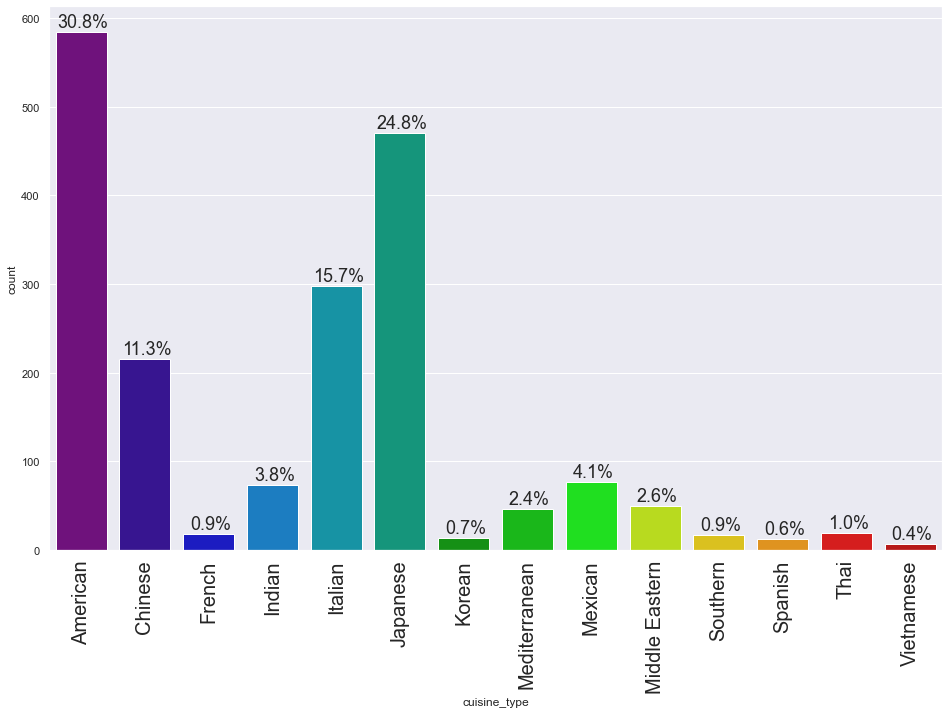

In [36]:
labeled_barplot(data, 'cuisine_type', perc=True)

#### There is a marked difference in the preference for American Cuisine (30.8%), Japanese (24.8%), Italian (15.7%) and Chinese (11.3%). There is a great business development opportunity with the kitchens of minority preference through the advertising impulse within the platform. Creating some system of rewards and discounts in these restaurants on some specific days, according of course to a more in-depth study of the data.

### cost_of_the_order

#### 1.- We extract the mean of the column 'cost_of_the_order'

In [37]:
print(data1['cost_of_the_order'].mean())

16.498851422550082


#### 2.- We extract the minimun value of the column 'cost_of_the_order'

In [38]:
print(data1['cost_of_the_order'].min())

4.47


#### 3.- We extract the maximun value of the column 'cost_of_the_order'

In [39]:
print(data1['cost_of_the_order'].max())

35.41


#### 4.- We extract the mode of the column 'cost_of_the_order'

In [40]:
print(data1['cost_of_the_order'].mode())

0    12.18
dtype: float64


#### 5.- We can check which are the prices of the orders repetead the most in the 'cost_of_the_order' column

In [41]:
data1['cost_of_the_order'].value_counts().head(10)

12.18    86
12.13    82
12.23    47
24.20    42
29.10    37
24.25    36
12.08    36
24.30    35
14.07    32
29.15    30
Name: cost_of_the_order, dtype: int64

In [42]:
print(data1['cost_of_the_order'].std())

7.483812110049553


#### We have to create a function to plot a boxplot and a histogram along the same scale.
#### *It was taken from the UBER_CASE study as well

In [43]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data1, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data1, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data1, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_hist2.axvline(
        data[feature].mode()[0], color="red", linestyle="-"
    )  # Add mode to the histogram

 #### Creating the boxplot and a histogram along the same scale

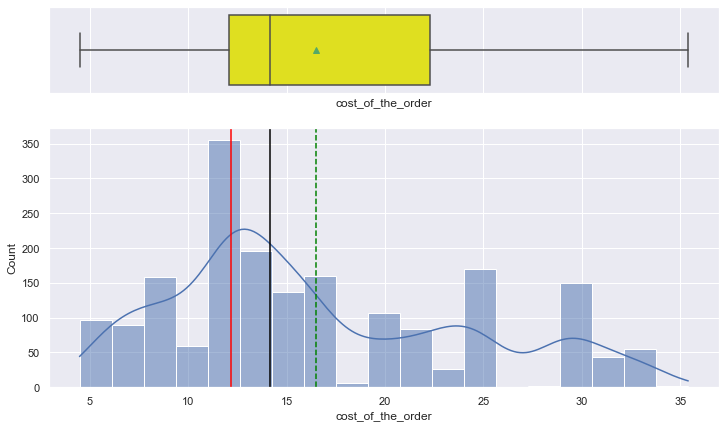

In [44]:
histogram_boxplot(data1, 'cost_of_the_order', kde=True)

### day_of_the_week

#### 1.- Obtaining the array of the unique day_of_the_week

In [45]:
data1['day_of_the_week'].unique()

['Weekend', 'Weekday']
Categories (2, object): ['Weekday', 'Weekend']

#### 2.- Counting the values of the array per each category

In [46]:
data1['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

#### 3.- Calculating the percentual weight per category

In [47]:
print("Percentage of orders on Weekend is:", round(1351/1898*100, 2), '%')
print("Percentage of orders on Weekday is:", round(547/1898*100, 2), '%')

Percentage of orders on Weekend is: 71.18 %
Percentage of orders on Weekday is: 28.82 %


#### 4.- Validating the previous code line with the percentual weight per category through a barplot

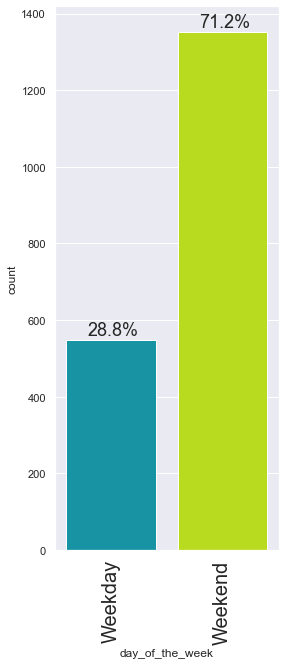

In [48]:
labeled_barplot(data1, 'day_of_the_week', perc=True)

### rating

#### 1.- Obtaining the array of the unique values for the 'rating' column

In [49]:
data1['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

#### 2.- Counting the values of the array per each category

In [50]:
data1['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### 3.- Calculating the percentual weight per category

In [51]:
data1['rating'].value_counts('rating')

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

In [52]:
print('"NOT GIVEN RATING" Percentage is:', round(0.387777*100, 2), '%')
print('"5 RATING" Percentage is:', round(0.309800*100, 2), '%')
print('"4 RATING" Percentage is:', round(0.203372*100, 2), '%')
print('"3 RATING" Percentage is:', round( 0.099052*100, 2), '%')

"NOT GIVEN RATING" Percentage is: 38.78 %
"5 RATING" Percentage is: 30.98 %
"4 RATING" Percentage is: 20.34 %
"3 RATING" Percentage is: 9.91 %


#### 4.- Validating the previous code line with the percentual weight per category through a barplot

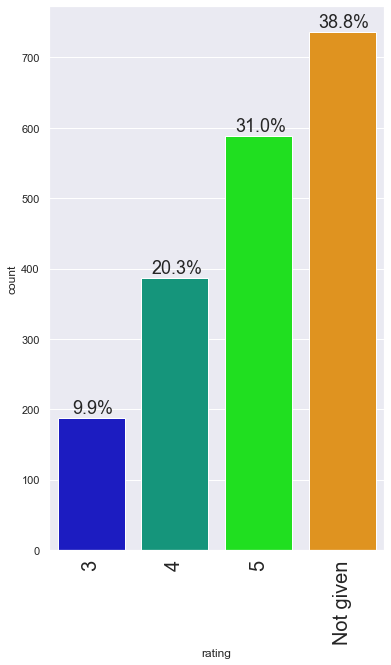

In [53]:
labeled_barplot(data, 'rating', perc=True)

### food_preparation_time

#### 1.- We extract the mean of the column 'food_preparation_time'

In [54]:
print(data1['food_preparation_time'].mean())

27.371970495258168


#### 2.- We extract the minimun value of the column 'food_preparation_time'

In [55]:
print(data1['food_preparation_time'].min())

20


#### 3.- We extract the maximun value of the column 'food_preparation_time'

In [56]:
print(data1['food_preparation_time'].max())

35


#### 4.- We extract the mode of the column 'food_preparation_time'

In [57]:
print(data1['food_preparation_time'].mode())

0    21
dtype: int64


#### 5.- We can check which is the food preparation time repetead the most in the 'food_preparation_time' column

In [58]:
data1['food_preparation_time'].value_counts().head(10)

21    135
23    123
27    123
22    123
28    121
24    121
20    119
30    119
33    118
35    117
Name: food_preparation_time, dtype: int64

#### 6.-Creating the boxplot and a histogram along the same scale to validate the main statistical values and the distribution

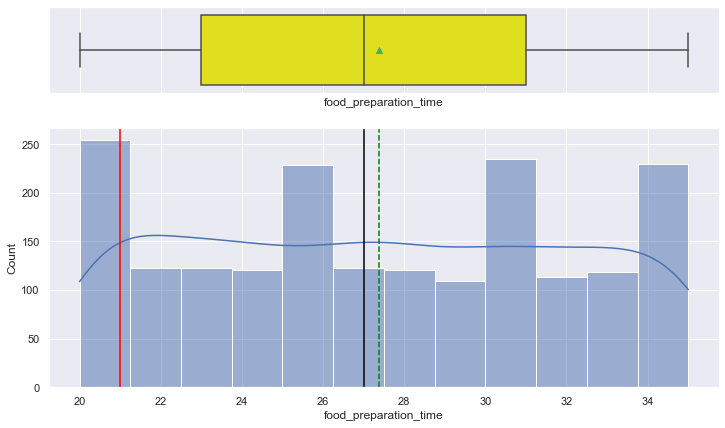

In [59]:
histogram_boxplot(data1, 'food_preparation_time', kde=True)

### delivery_time

#### 1.- We extract the mean of the column 'delivery_time'

In [60]:
print(data1['delivery_time'].mean())

24.161749209694417


#### 2.- We extract the minimun value of the column 'delivery_time'

In [61]:
print(data1['delivery_time'].min())

15


#### 3.- We extract the maximun value of the column 'delivery_time'

In [62]:
print(data1['delivery_time'].max())

33


#### 4.- We extract the mode  of the column 'delivery_time'

In [63]:
print(data1['delivery_time'].mode())

0    24
dtype: int64


#### 5.- We can check which is the delivery time repetead the most in the 'delivery_time' column

In [64]:
data1['delivery_time'].value_counts().head(10)

24    162
28    148
29    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
Name: delivery_time, dtype: int64

#### 6.-Creating the boxplot and a histogram along the same scale to validate the main statistical values and the distribution

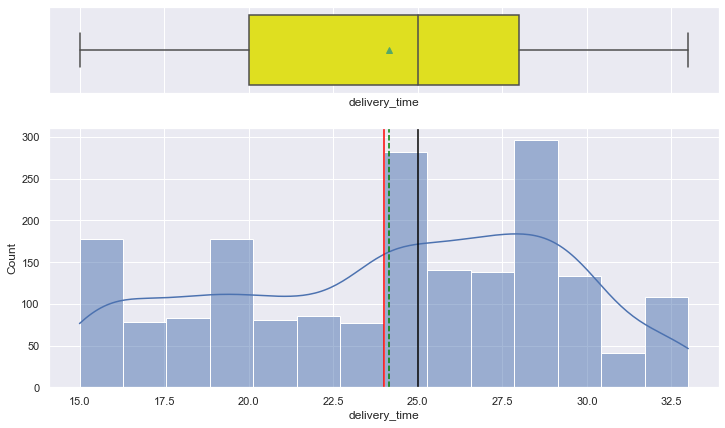

In [65]:
histogram_boxplot(data, 'delivery_time', kde=True)

In [66]:
len(data['delivery_time'].mode())

1

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

#### 1.-We count the values in the restaurant_name column to find the number of orders per restaurant

In [67]:
data['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### 2.-We can group by restaurant, cuisine type adding the food preparation time 

In [68]:
data1.groupby(['restaurant_name', 'cuisine_type'])['food_preparation_time'].sum().sort_values(ascending = False).head(14)

restaurant_name                cuisine_type
Shake Shack                    American        6120
Blue Ribbon Sushi              Japanese        3323
The Meatball Shop              Italian         3059
Blue Ribbon Fried Chicken      American        2611
Parm                           Italian         1857
RedFarm Broadway               Chinese         1628
RedFarm Hudson                 Chinese         1494
TAO                            Japanese        1312
Han Dynasty                    Chinese         1261
Nobu Next Door                 Japanese        1166
Blue Ribbon Sushi Bar & Grill  Japanese        1157
Rubirosa                       Italian         1045
Sushi of Gari 46               Japanese        1019
Blue Ribbon Sushi Izakaya      Japanese         833
Name: food_preparation_time, dtype: int64

#### 3.-Here we can check who has the better delivery time mean group by restaurant and cuisine type

In [69]:
data1.groupby(['restaurant_name', 'cuisine_type'])['delivery_time'].mean().sort_values(ascending = True).head(14)

restaurant_name              cuisine_type  
Paul & Jimmy's               Italian           15.000000
Hibino                       Japanese          15.000000
Gaia Italian Cafe            Italian           15.000000
The MasalaWala               Indian            15.000000
Galli Restaurant             Italian           16.000000
Wo Hop Restaurant            Chinese           16.000000
Coppola's East               Italian           16.000000
Market Table                 American          17.000000
Samurai Mama                 Japanese          18.000000
Byblos Restaurant            Middle Eastern    18.000000
Schnipper's Quality Kitchen  American          18.666667
Kambi Ramen House            Japanese          19.000000
Big Daddy's                  American          19.000000
Lamarca Pasta                Italian           19.000000
Name: delivery_time, dtype: float64

#### Observations: The restaurants with the most orders are those corresponding to American, Japanese and Italian cuisine. However, the lowest delivery times are found in restaurants associated with Italian cuisine and the lowest preparation times are those of the Japanese, Americans and Italians.


### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

#### 1.-Retrieving from the day_of_the_week column just the orders made on weekends

In [70]:
data1[data1['day_of_the_week'] == 'Weekend']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22
...,...,...,...,...,...,...,...,...,...
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


#### 2.-Extracting the orders made on weekends discretized by the cuisine type 

In [71]:
data1[data1['day_of_the_week'] == 'Weekend'].cuisine_type.value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### 3.-We do the same than the last code line to compare against the orders made on weekdays

In [72]:
data[data['day_of_the_week'] == 'Weekday'].cuisine_type.value_counts()

American          169
Japanese          135
Italian            91
Chinese            52
Mexican            24
Indian             24
Middle Eastern     17
Mediterranean      14
Southern            6
French              5
Thai                4
Vietnamese          3
Korean              2
Spanish             1
Name: cuisine_type, dtype: int64

#### Observations:
#### The cuisine pick is preferably American on weekends, as well as on weekdays. The ranking is followed by Japanese, Italian, and Chinese cuisine both on weekends and during the week. The main promotions and sales channels should be focused on this cuisine, of course without losing sight of the development of the other 3 main ones and the momentum of those that make up the base.

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

#### 1.-We want to retrieve from the dataset data1 the column "cost_of_the_order" where the values are greater than 20 dollars

In [73]:
data1[data1['cost_of_the_order']>20]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22
...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17


#### 2.-Obtaining the shape of the filter we ran in the last code line with .shape[0]

In [74]:
data1[data1['cost_of_the_order']>20].shape[0]

555

#### 3.-Obtaining the shape of the dataset to calculate the percentage of the orders greater than 20 dollars

In [75]:
data1.shape[0]

1898

#### 4.-Ecuation to calculate to calculate the percentage of the orders greater than 20 dollars

In [76]:
percentage_orders_over_20 = (data1[data1['cost_of_the_order']>20].shape[0]/data1.shape[0]) * 100

In [77]:
print("The percentage of orders over 20$ is:", round(percentage_orders_over_20, 2), '%')

The percentage of orders over 20$ is: 29.24 %


#### Observations:
#### A significant percentage of the orders (~ 30%) is above 20 dollars, which speaks of a good monetization of a large part of the total orders.


### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

#### 1.-Extracting the mean from de dataset data1, column delivery_time. 

In [78]:
data1['delivery_time'].mean()

24.161749209694417

In [79]:
delivery_time_mean = data1['delivery_time'].mean()
print('The mean delivery time is:', round(delivery_time_mean, 2), 'minutes')

The mean delivery time is: 24.16 minutes


#### Observations:

#### This delivery time is acceptable within the normal waiting margins in favor of customer satisfaction.


### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

#### 1.-From the dataset data1 we retrieve from the column "cost_of_the_order" the maximun value.

In [80]:
data1[data1['cost_of_the_order'] == data1['cost_of_the_order'].max()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


#### Observations:
#### in the barplot charts, outliers were already observed in the bar associated with Mediterranean cuisine, associated with these high-priced orders

### Bivariate Analysis

### In this section we are going to have a look on the relationship between the variables both Categorical vs Numericalas Numerical vs Numerical: 

### Question 12: Perform bivariate analysis to explore relationships between the important variables in the dataset. (7 marks)


#### 1.-Running the command .corr() to calculate the correlation between the numerical variables in the dataset data1

In [81]:
data1.corr().T

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


#### 2.-Declaring the numerical variables in num_var to plot a heat map to understand graphycally the relationship between the numerical variables

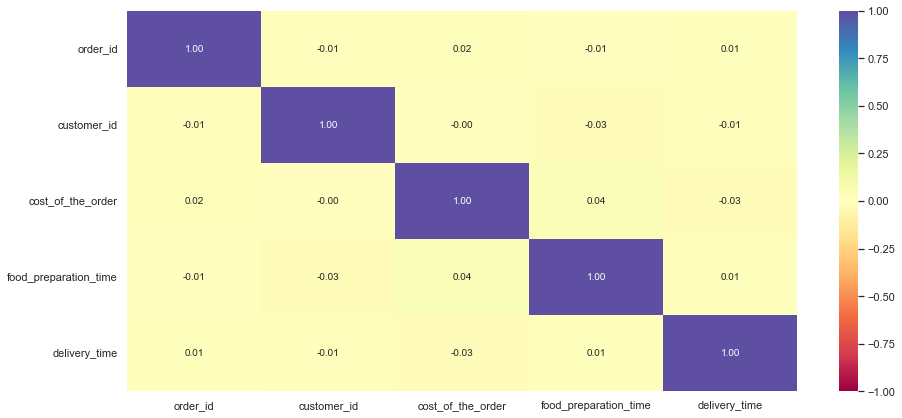

In [82]:
# Check for correlation among numerical variables
num_var = ['order_id','customer_id','cost_of_the_order','food_preparation_time','delivery_time']

corr = data1[num_var].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

#### 3.-Plotting a pairplot just as a double graphycal check 

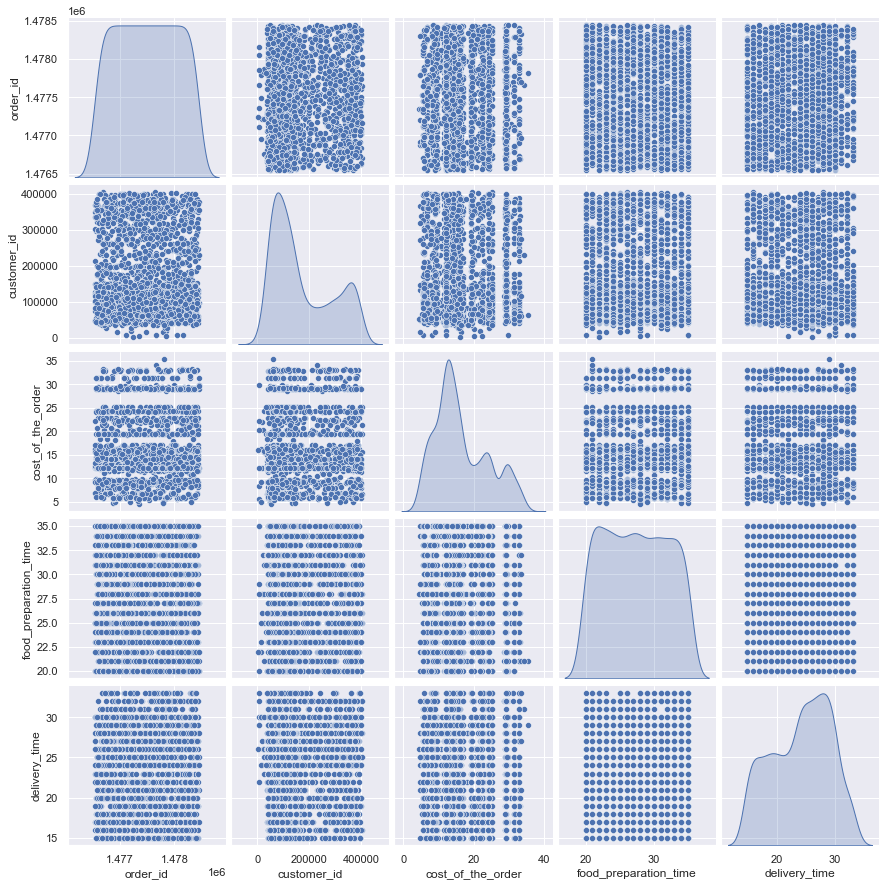

In [83]:
sns.pairplot(data=data1[num_var], diag_kind="kde")
plt.show()

### *No significant correlation trends are observed within the numerical variables
### *We will look for correlations between the Categorical vs Numerical variables

### Delivery Time vs Day of the Week

#### 1.-Boxplot delivery_time vs day_of_the_week to understand the statistical relationship between the variables

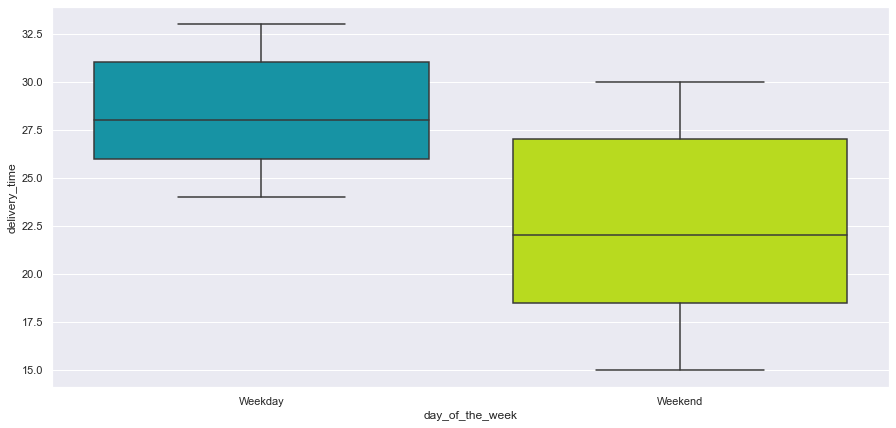

In [84]:
plt.figure(figsize=(15,7)) #size of the plot
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = data1, palette = 'nipy_spectral')  # (x,y,dataset, palette)
plt.show() #(display the plot)

#### There seems to be a more efficient response capacity during the weekend, even when the number of orders is increased to 150% of difference with respect to the days of weeks.

### Cuisine Type vs Food Preparation time

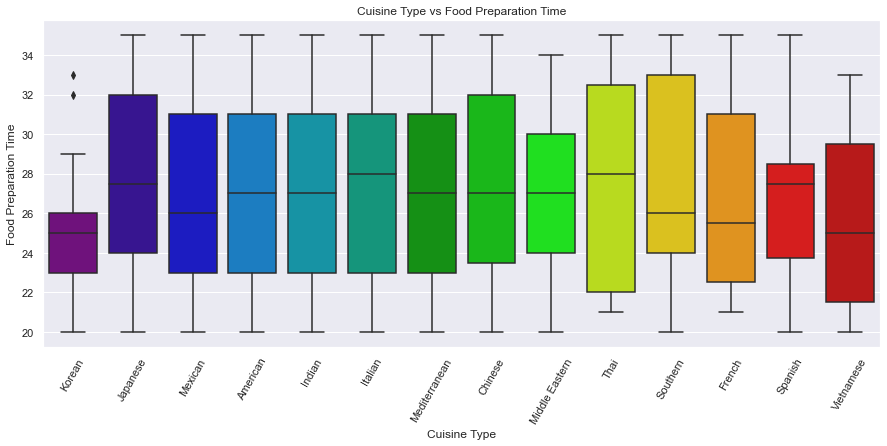

In [85]:
plt.figure(figsize=(15,6))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = data, palette = 'nipy_spectral')  
plt.xticks(rotation = 60)
plt.title("Cuisine Type vs Food Preparation Time")
plt.ylabel("Food Preparation Time")
plt.xlabel("Cuisine Type")
plt.show()

#### There are no great differences in these two variables outside of Korean cuisine, which seems to vary very little with respect to the others. It seems to be well understood that the preparation time is essential for the satisfaction of the client, therefore they are all quite even.

### Cost of the Order vs Cuisine Type

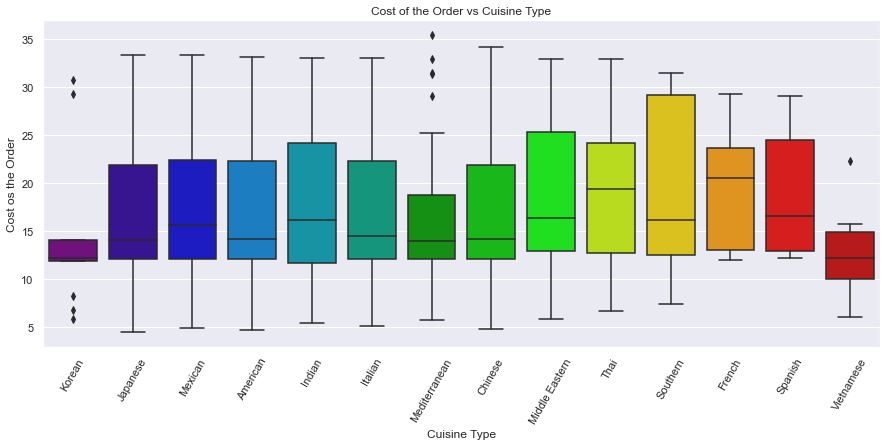

In [86]:
plt.figure(figsize=(15,6))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = data, palette = 'nipy_spectral')
plt.xticks(rotation = 60)
plt.title("Cost of the Order vs Cuisine Type")
plt.ylabel("Cost os the Order")
plt.xlabel("Cuisine Type")
plt.show()

#### There aren't many significant differences on this chart, apart from Korean and Vietnamese cuisine, which seem like the most economical options on the whole picture. Mediterranean cuisine presents some outliers in the cost of the orders, perhaps for some dishes that require special preparation. Outside of this, the market appears to be quite balanced in this sample.

### Rating vs Cost of the Order

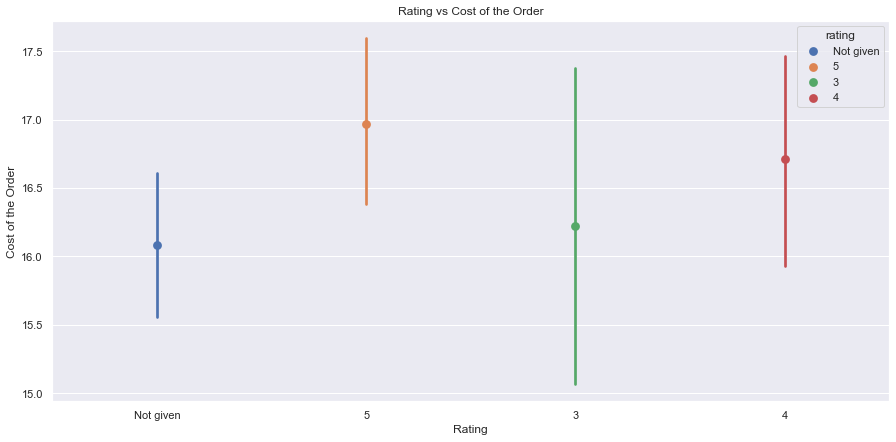

In [87]:
plt.figure(figsize=(15, 7)) #size of the plot
sns.pointplot(data = data1,x='rating',y= 'cost_of_the_order', hue='rating') #parameters
plt.title("Rating vs Cost of the Order") #Title
plt.ylabel("Cost of the Order") #variable y
plt.xlabel("Rating") #variable x
plt.show() #plotting the graph

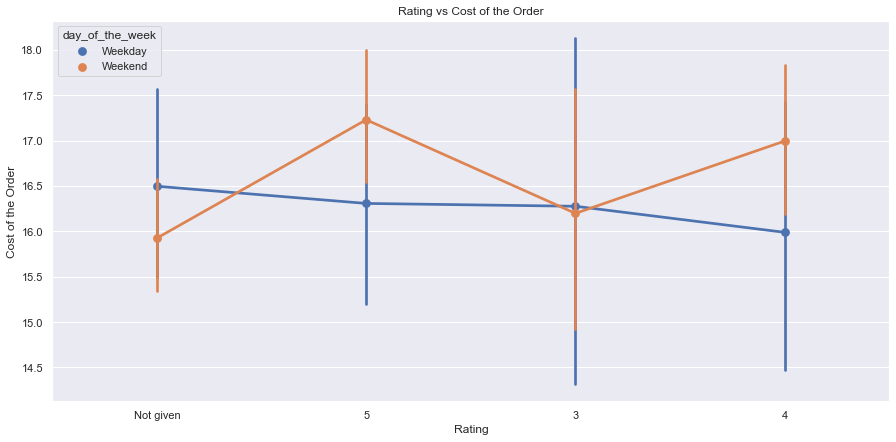

In [88]:
plt.figure(figsize=(15, 7)) #size of the plot
sns.pointplot(data = data1,x='rating',y= 'cost_of_the_order', hue='day_of_the_week') #parameters
plt.title("Rating vs Cost of the Order") #Title
plt.ylabel("Cost of the Order") #variable y
plt.xlabel("Rating") #variable x
plt.show() #plotting the graph

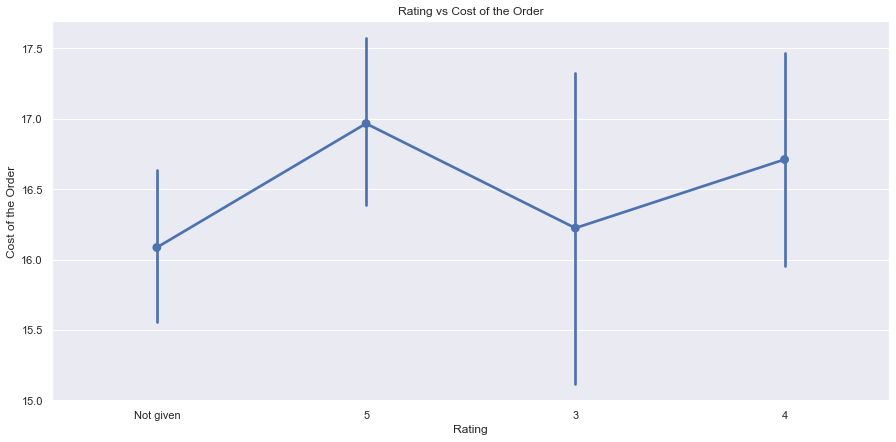

In [89]:
plt.figure(figsize=(15, 7))
sns.pointplot(data = data,x='rating',y= 'cost_of_the_order')
plt.title("Rating vs Cost of the Order")
plt.ylabel("Cost of the Order")
plt.xlabel("Rating")
plt.show()

#### It seems that there is a small relationship between the cost of the order and the rating value assigned by users. If the price of the order is lower the valuation is "Not given" or "3", while if it increases a little they tend to assign them "5" and "4".

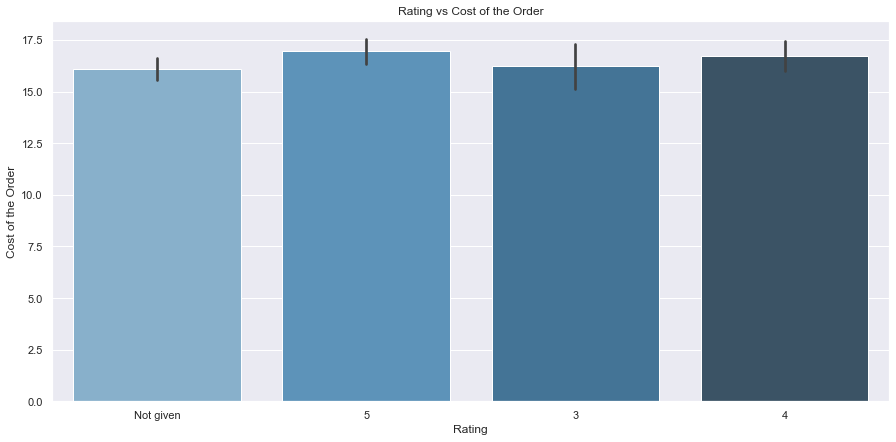

In [90]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(x="rating", y="cost_of_the_order", data=data, palette="Blues_d")
plt.title("Rating vs Cost of the Order")
plt.ylabel("Cost of the Order")
plt.xlabel("Rating")
plt.show()

#### This graph does not shows us in the best way the variations in the data that interest us

### Rating vs Food Preparation Time

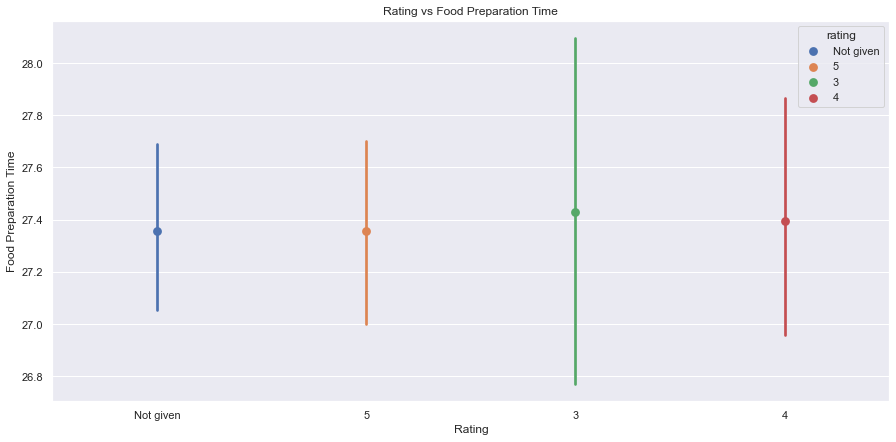

In [91]:
plt.figure(figsize=(15, 7))
sns.pointplot(data = data1,x='rating',y= 'food_preparation_time', hue='rating')
plt.title("Rating vs Food Preparation Time")
plt.ylabel("Food Preparation Time")
plt.xlabel("Rating")
plt.show()

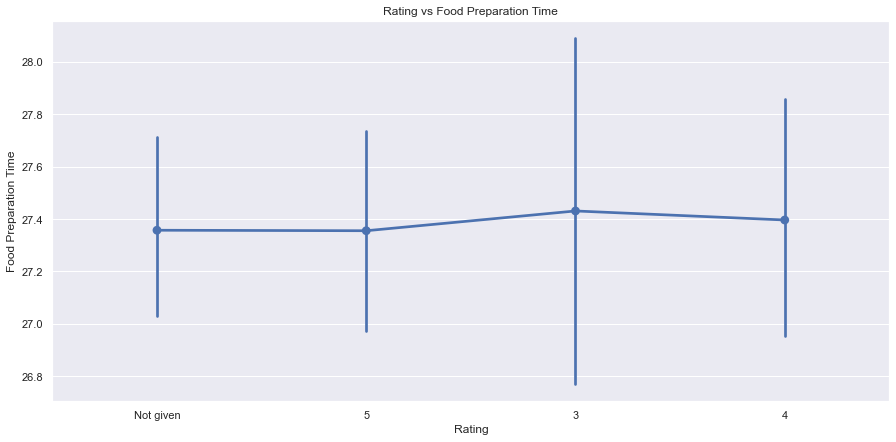

In [92]:
plt.figure(figsize=(15, 7))
sns.pointplot(data = data,x='rating',y= 'food_preparation_time')
plt.title("Rating vs Food Preparation Time")
plt.ylabel("Food Preparation Time")
plt.xlabel("Rating")
plt.show()

#### There seems to be a relationship between the preparation time and the rating assigned by users. Which is quite logical, if you increase your preparation and delivery times, users will tend to evaluate you with a lower rating.

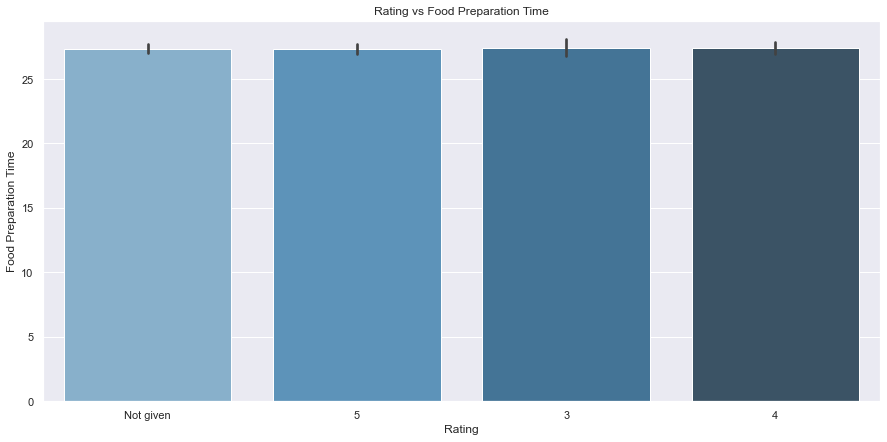

In [93]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(x="rating", y="food_preparation_time", data=data, palette="Blues_d")
plt.title("Rating vs Food Preparation Time")
plt.ylabel("Food Preparation Time")
plt.xlabel("Rating")
plt.show()

### Rating vs Delivery Time

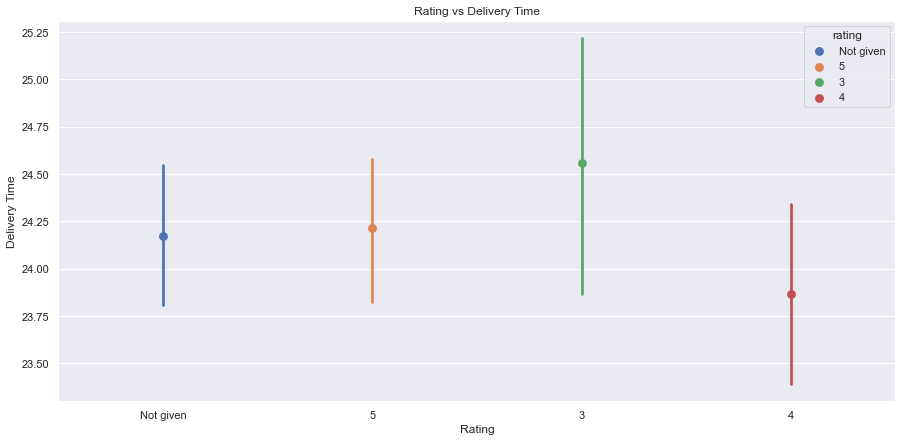

In [94]:
plt.figure(figsize=(15, 7))
sns.pointplot(data = data1,x='rating',y= 'delivery_time', hue='rating')
plt.title("Rating vs Delivery Time")
plt.ylabel("Delivery Time")
plt.xlabel("Rating")
plt.show()

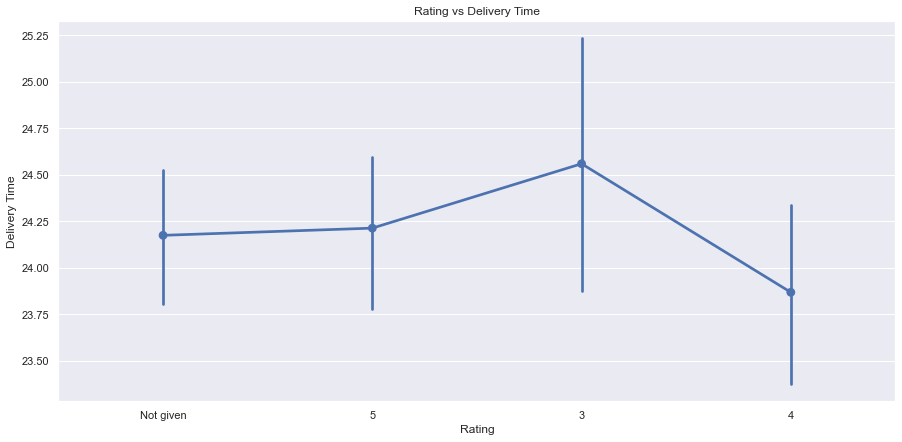

In [95]:
plt.figure(figsize=(15, 7))
sns.pointplot(data = data,x='rating',y= 'delivery_time')
plt.title("Rating vs Delivery Time")
plt.ylabel("Delivery Time")
plt.xlabel("Rating")
plt.show()

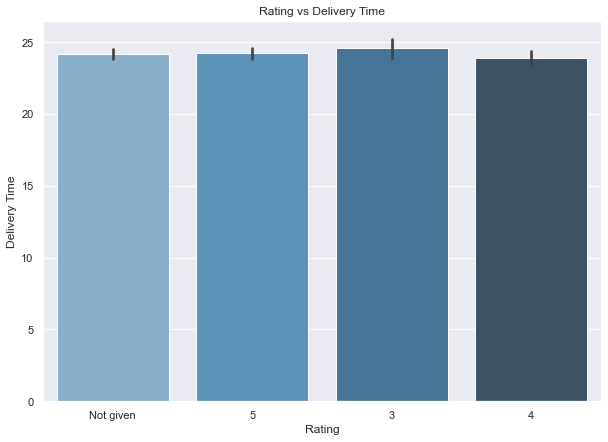

In [96]:
plt.figure(figsize=(10, 7))
ax = sns.barplot(x="rating", y="delivery_time", data=data, palette="Blues_d")
plt.title("Rating vs Delivery Time")
plt.ylabel("Delivery Time")
plt.xlabel("Rating")
plt.show()

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

#### MOVIE_LENS CASE EXAMPLE

In [97]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


In [98]:
data_out_notgiven = data[data['rating'] != 'Not given'].copy()
data_out_notgiven.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30


In [99]:
data_out_notgiven['rating'] = data_out_notgiven['rating'].astype('int')
data_out_notgiven['cuisine_type'] = data_out_notgiven['cuisine_type'].astype('category')
data_out_notgiven['restaurant_name'] = data_out_notgiven['restaurant_name'].astype('category')
data_out_notgiven['day_of_the_week'] = data_out_notgiven['day_of_the_week'].astype('category')
data_out_notgiven.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1162 non-null   int64   
 1   customer_id            1162 non-null   int64   
 2   restaurant_name        1162 non-null   category
 3   cuisine_type           1162 non-null   category
 4   cost_of_the_order      1162 non-null   float64 
 5   day_of_the_week        1162 non-null   category
 6   rating                 1162 non-null   int32   
 7   food_preparation_time  1162 non-null   int64   
 8   delivery_time          1162 non-null   int64   
dtypes: category(3), float64(1), int32(1), int64(4)
memory usage: 69.6 KB


In [100]:
data_out_notgiven.groupby(['restaurant_name', 'rating'])['rating'].sum().sort_values(ascending = False).head(25)

restaurant_name                rating
Shake Shack                    5         300
The Meatball Shop              5         265
Shake Shack                    4         200
Blue Ribbon Fried Chicken      5         160
Blue Ribbon Sushi              5         160
                               4         100
RedFarm Broadway               5          90
Blue Ribbon Fried Chicken      4          84
The Meatball Shop              4          84
Blue Ribbon Sushi Bar & Grill  5          75
RedFarm Hudson                 5          75
Parm                           5          70
Shake Shack                    3          69
TAO                            5          65
Han Dynasty                    5          65
Parm                           4          64
RedFarm Broadway               4          60
Jack's Wife Freda              5          55
Tamarind TriBeCa               5          55
Nobu Next Door                 5          55
Five Guys Burgers and Fries    5          55
Blue Ribbon Sushi

In [101]:
data_out_notgiven = data[data['rating'] != 'Not given'].copy()
data_out_notgiven.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30


In [102]:
# Finding average ratings for each restaurant and sorting them out in descending order
# using groupby() and sort_values() on merged data frame
df_rating = data_out_notgiven.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating.head(25)

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
5,Parm,39
6,RedFarm Hudson,34
7,TAO,28
8,Rubirosa,24
9,Nobu Next Door,23


####  Extracting the restaurants that have more than 50 in ratings

In [103]:
rest_over_50 = df_rating[df_rating['rating']>50]['restaurant_name']
rest_over_50

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

#### Getting the data where the restaurants have been rated with more than 50

In [104]:
df_rating_mean_4 = df_rating[df_rating['restaurant_name'].isin(rest_over_50)].copy()

#### Grouping by the condition established rating>50 rating mean>4

In [105]:
df_rating_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating
0,Shake Shack,133.0
1,The Meatball Shop,84.0
2,Blue Ribbon Sushi,73.0
3,Blue Ribbon Fried Chicken,64.0


#### Observations:
#### The four restaurants that meet the condition are the Shake Shack (American), The Meat ball Shop (Italian), Blue Ribbon Sushi (Japanese) and the Blue Ribbon Fried Chicken (American). These same restaurants are the leaders in order numbers, which, we could say is not by chance, since it has a good appreciation by customers, insurance associated with good service and good food.


### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

#### We have to add a new column call company_fee where we are going to charge 25% per orders greater than 20 dollars, 15% per orders greater than 5 dollars, and 0% per orders less than 5 dollars

In [106]:
data1['company_fee'] = [cost_of_the_order * 0.25 if cost_of_the_order > 20 else
                        cost_of_the_order * 0.15 if cost_of_the_order > 5 else
                        0
                        for cost_of_the_order in data1['cost_of_the_order']]

In [107]:
data1.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,company_fee
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [108]:
print(data1['company_fee'].sum())

6166.303


In [109]:
revenue_generated = data1['company_fee'].sum()
revenue_generated

6166.303

In [110]:
print('The revenue generated is:', round(revenue_generated ,2), '$$$')

The revenue generated is: 6166.3 $$$


#### Observations:


### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [111]:
data1['total_delivery_time'] = data1['food_preparation_time'] + data1['delivery_time']
data1.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,company_fee,total_delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [112]:
orders_over_60min = data1[data1['total_delivery_time'] > 60].value_counts
orders_over_60min

<bound method DataFrame.value_counts of       order_id  customer_id             restaurant_name    cuisine_type  \
7      1477859        89574                   Barbounia   Mediterranean   
10     1477895       143926  Big Wong Restaurant _¤¾Ñ¼         Chinese   
19     1477354        67487           Blue Ribbon Sushi        Japanese   
24     1476714       363783                Cafe Mogador  Middle Eastern   
54     1477760       130507           Jack's Wife Freda   Mediterranean   
...        ...          ...                         ...             ...   
1869   1476923        50199                 J. G. Melon        American   
1873   1478148       261371                 Shake Shack        American   
1875   1478039       292343                  Amy Ruth's        Southern   
1880   1477466       222734                 Shake Shack        American   
1889   1478190        94152            RedFarm Broadway         Chinese   

      cost_of_the_order day_of_the_week     rating  food_pr

In [113]:
 data1[data1['total_delivery_time']>60].shape[0]

200

In [114]:
data1[data1['total_delivery_time'] > 60].value_counts('total_delivery_time')

total_delivery_time
61    53
62    40
64    34
63    33
65    19
67     9
68     7
66     5
dtype: int64

In [115]:
Percentage_orders_over_60 =  data1[data1['total_delivery_time']>60].shape[0]/data1.shape[0]*100
print('The percentage weight of the orders over 60 minute is:', round(Percentage_orders_over_60 ,2), '%')

The percentage weight of the orders over 60 minute is: 10.54 %


#### Observations:
#### The percentage of orders over 60 minutes is low with respect to the total, reaching only 10.54%. Which means that fast service predominates and within the margins considered tolerable in terms of waiting.


### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [116]:
mean_delivery_weekends = data1[data1['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print('The mean of the delivery time during the weekends is:', round(mean_delivery_weekends ,2), 'minutes')

The mean of the delivery time during the weekends is: 22.47 minutes


In [117]:
mean_delivery_weekdays = data1[data1['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
print('The mean of the delivery time during the weekdays is:', round(mean_delivery_weekdays ,2), 'minutes')

The mean of the delivery time during the weekdays is: 28.34 minutes


In [118]:
mean_food_preparation_time_weekdays = data1[data1['day_of_the_week'] == 'Weekday']['food_preparation_time'].mean()
print('The mean of the delivery time during the weekdays is:', round(mean_food_preparation_time_weekdays ,2), 'minutes')

The mean of the delivery time during the weekdays is: 27.21 minutes


In [123]:
mean_food_preparation_time_weekends = data[data['day_of_the_week'] == 'Weekdend']['food_preparation_time'].mean()
print('The mean of the delivery time during the weekends is:', round(mean_food_preparation_time_weekends ,2), 'minutes')

The mean of the delivery time during the weekends is: nan minutes


In [120]:
mean_Total_delivery_time_weekends = data1[data1['day_of_the_week'] == 'Weekend']['total_delivery_time'].mean()
print('The mean of the total delivery time during the weekends is:', round(mean_Total_delivery_time_weekends ,2), 'minutes')

The mean of the total delivery time during the weekends is: 49.91 minutes


In [121]:
mean_Total_delivery_time_weekdays = data1[data1['day_of_the_week'] == 'Weekday']['total_delivery_time'].mean()
print('The mean of the total delivery time during the weekdays is:', round(mean_Total_delivery_time_weekdays ,2), 'minutes')

The mean of the total delivery time during the weekdays is: 55.55 minutes


#### Observations: 
#### The average delivery and total time delivery during the weekends (22.47 min) is contradictorily lower, since the orders increase notably during the weekends (28.34). This may be the result of a greater volume of drivers available for the weekend and possibly the tips and stimuli provided by the platform and customers are better.

### Conclusion and Recommendations

#### 1.-The standard deviation of the order cost is 7.48. It would be beneficial to investigate the relationship between the cuisines with less demand and the prices of their orders to establish alerts within the platform for traders that greatly exceed the prices with respect to the average and thus maintain a fluid economic activity within the platform.

#### 2.-Orders during the weekends rise 150% above the orders during the week, it is important to add the largest number of distributors or drivers during the weekends in order to reduce delivery times. All this through a system of incentives and rewards for delivery drivers that make work economically attractive on weekends.

#### 3.-It would be beneficial to capture and discretize the data by days of the week and also to capture the timestamps in order to identify the hot days and hours for forecasting plans with respect to the logistics of delivery people.

#### 4.-No abnormal statistical trends are observed between the variables. In the case of preparation times and delivery times, the data is quite similar in terms of percentiles, maximum and minimum values and the standard deviation. While in the case of the cost of the orders, the standard deviation is greater, which indicates a greater dispersion between the data, which seems logical.

#### 5.-The low standard deviation for the time of preparation of orders and delivery time, seems to indicate that there is an awareness of the competition for fast delivery and keeping the times as short as possible for customer satisfaction.

#### 6.-Orders under "NOT GIVEN" rating, represents a significant percentage of 38.8% of the total orders. It is important to create a discount or rewards plan for those users who generate feedback in the valuation of the orders. This would allow us to get to know our clients much more, and therefore boost the business model and user experience. 

#### 7.-There is a clear dominance of the orders belonging to American cuisine (30.8%), Japanese (24.8), Italian (11.3) and Chinese (11.3). A marketing plan could be developed within the platform that encourages other types of cuisines such as French, Korean, Spanish, Thai, Vietnamese, among others, that benefits entrepreneurs of all nationalities and in turn allows us to grow our economic model.

#### 8.-The restaurants with the most orders are those corresponding to American, Japanese and Italian cuisine. However, the lowest delivery times are found in restaurants associated with Italian cuisine and the lowest preparation times are those of the Japanese, Americans and Italians. It is important that in the platform's recommendation system these times are taken into account for the recommendation to customers when choosing a type of restaurant. Likewise, restaurants that meet the lowest times on average should be ranked in the top positions in the platform's search engines.

#### 9.-The cuisine pick is preferably American on weekends, as well as on weekdays. The ranking is followed by Japanese, Italian, and Chinese cuisine both on weekends and during the week. The main promotions and sales channels should be focused on this cuisine, of course without losing sight of the development of the other 3 main ones and the momentum of those that make up the base.

#### 10.-When we evaluated the delivery time vs day of the week it seems to be a more efficient response capacity during the weekend, even when the number of orders is increased to 150% of difference with respect to the days of weeks. Anyone would think that delivery times would tend to go up due to the increase in the number of orders. It would be necessary to evaluate how many drivers become available during the weekend and also the incentives during these days

#### 11.-There are no great differences in the comparison between Food preparation time vs Cuisine type variables outside of Korean cuisine, which seems to vary very little with respect to the others. It seems to be well understood that the preparation time is essential for the satisfaction of the client, therefore they are all quite even. When any of the restaurants exceed these values, alerts and even penalties must be established, so that service efficiency is always maintained.

#### 12.-There seems to be a relationship between the preparation time and the rating assigned by users. Which is quite logical, if you increase your preparation and delivery times, users will tend to evaluate you with a lower rating. For this reason, award strategies must always be implemented throughout the chain within the platform so that efficiency is maintained throughout the process.

#### 13.-It seems that there is a small relationship between the cost of the order and the rating value assigned by users in the point plot. If the price of the order is lower the valuation is "Not given" or "3", while if it increases a little they tend to assign them "5" and "4".

#### 14.-The four restaurants better rated are the Shake Shack (American), The Meat ball Shop (Italian), Blue Ribbon Sushi (Japanese) and the Blue Ribbon Fried Chicken (American). These same restaurants are the leaders in order numbers, which, we could say is not by chance, since it has a good appreciation by customers, insurance associated with good service and good food. They must be exalted every week through the platform and excellence is rewarded with notoriety in the search engine so that it serves as an example for other restaurants and fuels competition between them.

#### 15.-The percentage of orders over 60 minutes is low with respect to the total, reaching only 10.54%. Which means that fast service predominates and within the margins considered tolerable in terms of waiting.

#### 16.-The average delivery and total time delivery during the weekends (22.47 min) is contradictorily lower, since the orders increase notably during the weekends (28.34). This may be the result of a greater volume of drivers available for the weekend and possibly the tips and stimuli provided by the platform and customers are better.

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (3 marks)

#### 1.-The standard deviation of the order cost is 7.48. It would be beneficial to investigate the relationship between the cuisines with less demand and the prices of their orders to establish alerts within the platform for traders that greatly exceed the prices with respect to the average and thus maintain a fluid economic activity within the platform.

#### 2.-Orders during the weekends rise 150% above the orders during the week, it is important to add the largest number of distributors or drivers during the weekends in order to reduce delivery times. All this through a system of incentives and rewards for delivery drivers that make work economically attractive on weekends.

#### 3.-It would be beneficial to capture and discretize the data by days of the week and also to capture the timestamps in order to identify the hot days and hours for forecasting plans with respect to the logistics of delivery people.

#### 4.-No abnormal statistical trends are observed between the variables. In the case of preparation times and delivery times, the data is quite similar in terms of percentiles, maximum and minimum values and the standard deviation. While in the case of the cost of the orders, the standard deviation is greater, which indicates a greater dispersion between the data, which seems logical.

#### 5.-The low standard deviation for the time of preparation of orders and delivery time, seems to indicate that there is an awareness of the competition for fast delivery and keeping the times as short as possible for customer satisfaction.

#### 6.-Orders under "NOT GIVEN" rating, represents a significant percentage of 38.8% of the total orders. It is important to create a discount or rewards plan for those users who generate feedback in the valuation of the orders. This would allow us to get to know our clients much more, and therefore boost the business model and user experience. 

#### 7.-There is a clear dominance of the orders belonging to American cuisine (30.8%), Japanese (24.8), Italian (11.3) and Chinese (11.3). A marketing plan could be developed within the platform that encourages other types of cuisines such as French, Korean, Spanish, Thai, Vietnamese, among others, that benefits entrepreneurs of all nationalities and in turn allows us to grow our economic model.

#### 8.-The restaurants with the most orders are those corresponding to American, Japanese and Italian cuisine. However, the lowest delivery times are found in restaurants associated with Italian cuisine and the lowest preparation times are those of the Japanese, Americans and Italians. It is important that in the platform's recommendation system these times are taken into account for the recommendation to customers when choosing a type of restaurant. Likewise, restaurants that meet the lowest times on average should be ranked in the top positions in the platform's search engines.

#### 9.-The cuisine pick is preferably American on weekends, as well as on weekdays. The ranking is followed by Japanese, Italian, and Chinese cuisine both on weekends and during the week. The main promotions and sales channels should be focused on this cuisine, of course without losing sight of the development of the other 3 main ones and the momentum of those that make up the base.

#### 10.-When we evaluated the delivery time vs day of the week it seems to be a more efficient response capacity during the weekend, even when the number of orders is increased to 150% of difference with respect to the days of weeks. Anyone would think that delivery times would tend to go up due to the increase in the number of orders. It would be necessary to evaluate how many drivers become available during the weekend and also the incentives during these days

#### 11.-There are no great differences in the comparison between Food preparation time vs Cuisine type variables outside of Korean cuisine, which seems to vary very little with respect to the others. It seems to be well understood that the preparation time is essential for the satisfaction of the client, therefore they are all quite even. When any of the restaurants exceed these values, alerts and even penalties must be established, so that service efficiency is always maintained.

#### 12.-There seems to be a relationship between the preparation time and the rating assigned by users. Which is quite logical, if you increase your preparation and delivery times, users will tend to evaluate you with a lower rating. For this reason, award strategies must always be implemented throughout the chain within the platform so that efficiency is maintained throughout the process.

#### 13.-It seems that there is a small relationship between the cost of the order and the rating value assigned by users in the point plot. If the price of the order is lower the valuation is "Not given" or "3", while if it increases a little they tend to assign them "5" and "4".

#### 14.-The four restaurants better rated are the Shake Shack (American), The Meat ball Shop (Italian), Blue Ribbon Sushi (Japanese) and the Blue Ribbon Fried Chicken (American). These same restaurants are the leaders in order numbers, which, we could say is not by chance, since it has a good appreciation by customers, insurance associated with good service and good food. They must be exalted every week through the platform and excellence is rewarded with notoriety in the search engine so that it serves as an example for other restaurants and fuels competition between them.

#### 15.-The percentage of orders over 60 minutes is low with respect to the total, reaching only 10.54%. Which means that fast service predominates and within the margins considered tolerable in terms of waiting.

#### 16.-The average delivery and total time delivery during the weekends is contradictorily lower, since the orders increase notably during the weekends. This may be the result of a greater volume of drivers available for the weekend and possibly the tips and stimuli provided by the platform and customers are better.

#### Key Insights: